In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

To do - image rescalen naar 100x100
confusion matrix
plots
model

In [2]:
trainDS = tf.data.Dataset.list_files('data/train/*/*', shuffle=False)
test_ds = tf.data.Dataset.list_files('data/test/*/*', shuffle=False)

2022-11-04 11:20:40.093165: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Check dataset

In [3]:
for file in trainDS.take(3):
    print(file.numpy())

for file in test_ds.take(3):
    print(file.numpy())

b'data/train/Blotch_Apple/blotch_1.jpg'
b'data/train/Blotch_Apple/blotch_10.jpg'
b'data/train/Blotch_Apple/blotch_100.jpg'
b'data/test/Blotch_Apple/blotch_1.jpg'
b'data/test/Blotch_Apple/blotch_10.jpg'
b'data/test/Blotch_Apple/blotch_11.jpg'


Shuffle function

In [4]:
# trainDS = trainDS.shuffle(64)
# for file in trainDS.take(5):
#     print(file.numpy())

# testDS = testDS.shuffle(64)
# for file in testDS.take(3):
#     print(file.numpy())

Class Names

In [5]:
classNames = ["blotch","normal","rot","scab"]

Number of Images in Dataset

In [6]:
imageCountTrain = len(trainDS)
print (imageCountTrain)
imageCountTest = len(test_ds)
imageCountTest
print (imageCountTest)

382
120


In [7]:
val_size = int(imageCountTrain * 0.2)
train_ds = trainDS.skip(val_size)
val_ds = trainDS.take(val_size)

Images in Train, Test and Val DS

In [8]:
print (len(train_ds))
print (len(val_ds))
print (len(test_ds))

306
76
120


Getting Images and Labels for each item in the dataset

In [9]:
def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]

PARAMETERS

In [10]:
img_height = 100
img_width = 100
image_size=(img_height, img_width)
batch_size = 32

In [11]:
def process_image(file_path):
    label = get_label(file_path)
    
    img = tf.io.read_file(file_path)
    # img = tf.image.resize_with_crop_or_pad(img, 100,100)
    img = tf.image.decode_jpeg(img)
    
    return img, label

In [12]:
for t in train_ds.take(4):
    print(t.numpy())

b'data/train/Blotch_Apple/blotch_63.jpg'
b'data/train/Blotch_Apple/blotch_64.jpg'
b'data/train/Blotch_Apple/blotch_65.jpg'
b'data/train/Blotch_Apple/blotch_66.jpg'


In [13]:
train_ds = train_ds.map(process_image)
for img, label in train_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[116 117 112]
  [116 117 112]
  [116 117 112]
  ...
  [156 155 153]
  [156 155 153]
  [157 156 154]]

 [[116 117 112]
  [116 117 112]
  [116 117 112]
  ...
  [156 155 153]
  [156 155 153]
  [156 155 153]]

 [[116 117 112]
  [116 117 112]
  [116 117 112]
  ...
  [155 154 152]
  [155 154 152]
  [155 154 152]]

 ...

 [[114 115 110]
  [115 116 111]
  [115 116 111]
  ...
  [148 148 148]
  [146 144 145]
  [145 143 144]]

 [[114 115 110]
  [115 116 111]
  [115 116 111]
  ...
  [149 149 149]
  [148 146 147]
  [146 144 145]]

 [[114 115 110]
  [115 116 111]
  [115 116 111]
  ...
  [150 150 150]
  [149 147 148]
  [148 146 147]]], shape=(845, 1024, 3), dtype=uint8)
Label:  tf.Tensor(b'Blotch_Apple', shape=(), dtype=string)
Image:  tf.Tensor(
[[[19 39 50]
  [11 31 42]
  [ 5 25 36]
  ...
  [16 18 39]
  [15 17 38]
  [14 16 37]]

 [[ 8 28 39]
  [12 32 43]
  [14 34 45]
  ...
  [16 18 39]
  [16 18 39]
  [17 19 40]]

 [[ 7 25 37]
  [10 28 40]
  [10 28 40]
  ...
  [15 17 38]
  [14 1

In [14]:
test_ds = test_ds.map(process_image)
for img, label in test_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[146 149 140]
  [147 150 141]
  [149 152 143]
  ...
  [120 113 107]
  [123 116 110]
  [124 117 111]]

 [[148 151 142]
  [149 152 143]
  [150 153 144]
  ...
  [121 114 108]
  [123 116 110]
  [125 118 112]]

 [[151 154 147]
  [151 154 147]
  [151 154 147]
  ...
  [120 113 105]
  [122 115 107]
  [124 117 109]]

 ...

 [[114 115 109]
  [115 116 110]
  [117 118 110]
  ...
  [112 113 108]
  [117 118 113]
  [119 120 115]]

 [[112 113 107]
  [113 114 108]
  [116 117 109]
  ...
  [106 107 102]
  [113 114 109]
  [117 118 113]]

 [[109 110 104]
  [111 112 106]
  [114 115 107]
  ...
  [102 103  98]
  [112 113 108]
  [118 119 114]]], shape=(296, 253, 3), dtype=uint8)
Label:  tf.Tensor(b'Blotch_Apple', shape=(), dtype=string)
Image:  tf.Tensor(
[[[158 116   0]
  [153 111   0]
  [152 110   0]
  ...
  [ 97  61  11]
  [ 93  57   7]
  [ 93  56   4]]

 [[174 132  12]
  [165 123   3]
  [159 117   0]
  ...
  [ 95  62  11]
  [ 93  57   7]
  [ 91  54   2]]

 [[198 157  31]
  [184 143  17

In [15]:
val_ds = val_ds.map(process_image)
for img, label in val_ds.take(3):
    print("Image: ", img)
    print("Label: ",label)

Image:  tf.Tensor(
[[[93 94 89]
  [93 94 89]
  [92 93 88]
  ...
  [88 90 85]
  [86 91 85]
  [86 91 85]]

 [[94 95 90]
  [93 94 89]
  [92 93 88]
  ...
  [88 90 85]
  [86 91 85]
  [86 91 85]]

 [[94 95 90]
  [93 94 89]
  [93 94 89]
  ...
  [89 91 86]
  [86 91 85]
  [86 91 85]]

 ...

 [[50 55 49]
  [71 76 70]
  [52 57 51]
  ...
  [ 3  3  3]
  [ 5  5  5]
  [44 44 44]]

 [[63 68 62]
  [64 69 63]
  [56 61 55]
  ...
  [ 6  6  6]
  [13 13 13]
  [24 24 24]]

 [[63 68 62]
  [64 69 63]
  [56 61 55]
  ...
  [32 32 32]
  [37 37 37]
  [45 45 45]]], shape=(194, 259, 3), dtype=uint8)
Label:  tf.Tensor(b'Blotch_Apple', shape=(), dtype=string)
Image:  tf.Tensor(
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 50  60  61]
  [ 49  59  60]
  [ 45  54  53]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 50  60  61]
  [ 49  59  60]
  [ 45  54  53]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 48  58  59]
  [ 47  57  58]
  [ 44  53  52]]

 ...

 [[ 65  66  58]
  [ 65  66  

Scale function

In [16]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [img_height, img_width])
  image = (image / 255.0)
  return image, label

In [17]:
train_ds = train_ds.map(resize_and_rescale)
for image, label in train_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.45490196 0.45882353 0.4392157 ]
****Label:  b'Blotch_Apple'
****Image:  [0.04509804 0.11960784 0.16470589]
****Label:  b'Blotch_Apple'
****Image:  [0.35093805 0.3705459  0.34701648]
****Label:  b'Blotch_Apple'
****Image:  [0.51207846 0.52266663 0.4975686 ]
****Label:  b'Blotch_Apple'
****Image:  [0.6900196 0.6076667 0.7292353]
****Label:  b'Blotch_Apple'


In [18]:
test_ds = test_ds.map(resize_and_rescale)
for image, label in test_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.5832353 0.595     0.5597059]
****Label:  b'Blotch_Apple'
****Image:  [0.65561175 0.49161175 0.01847647]
****Label:  b'Blotch_Apple'
****Image:  [0.64997    0.568068   0.29079354]
****Label:  b'Blotch_Apple'
****Image:  [0.5569704 0.5961861 0.3596863]
****Label:  b'Blotch_Apple'
****Image:  [0.38814953 0.41167894 0.2626593 ]
****Label:  b'Blotch_Apple'


In [19]:
val_ds = val_ds.map(resize_and_rescale)
for image, label in val_ds.take(5):
   print ("****Image: ",image.numpy()[0][0])
   print ("****Label: ",label.numpy() )

****Image:  [0.36508372 0.3690053  0.34939745]
****Label:  b'Blotch_Apple'
****Image:  [0. 0. 0.]
****Label:  b'Blotch_Apple'
****Image:  [0.6884902  0.59829414 0.70809805]
****Label:  b'Blotch_Apple'
****Image:  [0.6846078 0.7081372 0.7944118]
****Label:  b'Blotch_Apple'
****Image:  [0.35686275 0.43529412 0.20392157]
****Label:  b'Blotch_Apple'


These operations can be chained but i kept them separate for clarity and possibly oop.

In [20]:
list_trainDS = tf.data.Dataset.list_files(str('data/train/*/*'))
list_train_ds = list_trainDS.skip(val_size)
list_val_ds = trainDS.take(val_size)
list_test_ds = tf.data.Dataset.list_files(str('data/test/*/*'))

In [21]:
print (len(list_train_ds))
print (len(list_test_ds))
print (len(list_val_ds))

306
120
76


CAN I CHANGE THIS FROM FILE_PATH LIST TO THE SCALED IMAGES?

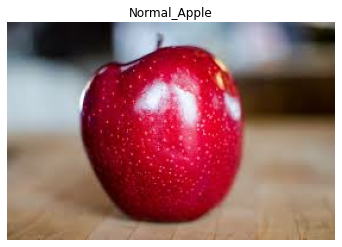

In [22]:
file_path = next(iter(list_train_ds))
image, label = process_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

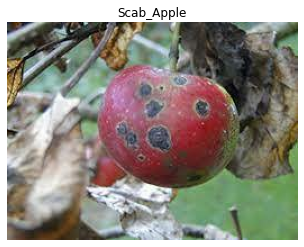

In [23]:
images_train_ds = list_train_ds.map(process_image)

for image, label in images_train_ds.take(1):
  show(image, label)

Rotate image

In [24]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


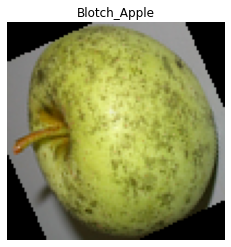

In [25]:
image, label = next(iter(train_ds))
image = random_rotate_image(image)
show(image, label)

In [26]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

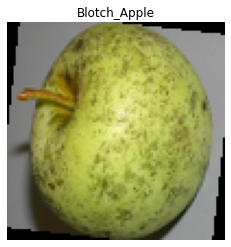

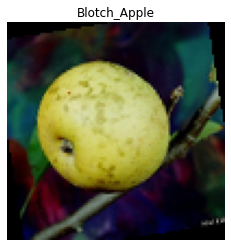

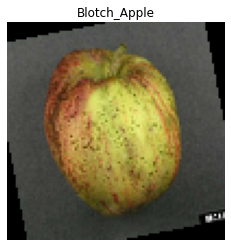

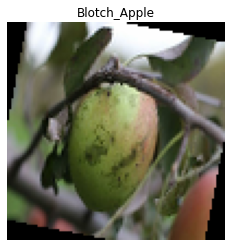

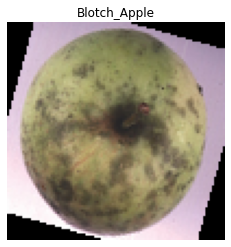

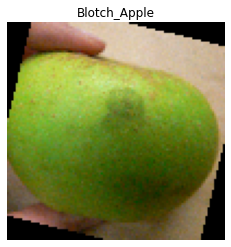

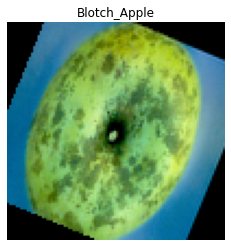

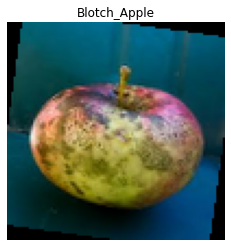

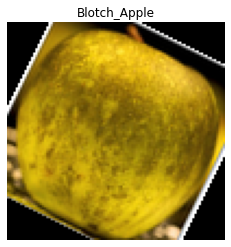

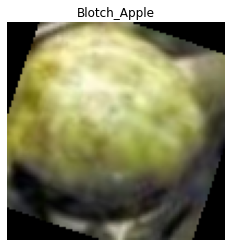

In [27]:
rot_ds = train_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(10):
  show(image, label)

resampling kan imbalance in data set wellicht verhelpen: https://www.tensorflow.org/guide/data


Create the model

In [28]:
num_classes = len(classNames)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

NameError: name 'input_shape' is not defined

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
plt.figure(figsize=(10, 10))
for image, label in rot_ds.take(1):
  for i in range(9):
    show(image, label)


# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     # plt.title(class_names[labels[i]])
#     plt.axis("off")

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

later over and underfit